In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format


# Un primer analisis de los DF

## Installs

In [287]:
installs = pd.read_csv('data/installs.csv',low_memory=False, parse_dates = ['created'])
installs.describe()

,application_id,ref_type,ref_hash,click_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,"3,412.00","3,412.00","3,412.00",0.00,"3,412.00","1,047.00","3,411.00","3,412.00","3,378.00"
mean,10.25,"1,736,533,237,676,398,080.00","4,598,201,895,093,175,296.00",nan,"4,764,400,876,953,753,600.00","1,877,863,611,061,168,896.00","4,245,275,763,008,425,984.00","4,562,039,566,821,860,864.00","4,915,828,330,143,634,432.00"
std,6.02,"193,697,630,282,642,944.00","2,663,827,726,655,556,608.00",nan,"1,678,050,662,913,425,408.00","1,886,461,185,004,080,128.00","2,620,843,701,431,818,752.00","2,683,422,255,419,026,432.00","2,477,019,279,750,212,608.00"
min,0.00,"1,494,519,392,962,156,800.00","4,958,526,679,100,225.00",nan,"2,970,470,518,450,881,024.00","308,305,860,557,778,688.00","51,125,050,827,768,144.00","7,118,753,876,860,506.00","110,153,915,248,271,648.00"
25%,7.00,"1,494,519,392,962,156,800.00","2,268,352,778,868,107,520.00",nan,"2,970,470,518,450,881,024.00","308,305,860,557,778,688.00","2,331,946,610,914,169,856.00","2,249,196,592,953,800,448.00","3,301,377,775,977,699,840.00"
50%,9.00,"1,891,515,180,541,284,352.00","4,603,806,636,293,553,152.00",nan,"6,333,597,102,633,388,032.00","2,208,834,667,126,999,296.00","2,983,637,540,473,392,128.00","4,436,112,593,864,796,160.00","3,301,377,775,977,699,840.00"
75%,10.00,"1,891,515,180,541,284,352.00","6,912,403,645,454,140,416.00",nan,"6,333,597,102,633,388,032.00","2,523,245,982,232,924,160.00","6,882,414,520,414,359,552.00","7,017,563,642,532,624,384.00","6,977,049,253,562,486,784.00"
max,36.00,"1,891,515,180,541,284,352.00","9,218,934,271,985,603,584.00",nan,"6,333,597,102,633,388,032.00","9,169,526,525,480,200,192.00","9,222,450,236,218,316,800.00","9,221,949,873,099,484,160.00","9,028,382,655,101,200,384.00"


## Propongo categorias para las columnas

### A partir de analisis que se hacen despues

In [288]:
def categorizarRefType(x):
    return 1 if int(x)==1891515180541284343 else 2

installs['ref_type'] = installs['ref_type'].apply(categorizarRefType)

In [289]:
def categorizarCountrycode(x):
    return 1 if int(x)==6333597102633388268 else 2

installs['device_countrycode'] = installs['device_countrycode'].apply(categorizarCountrycode)

In [290]:
marcas = list(installs['device_brand'].drop_duplicates())

def categorizarDeviceBrand(x):
    return marcas.index(x) if (x != -1) else x

installs['device_brand'] = installs['device_brand'].fillna(-1).apply(categorizarDeviceBrand)

In [291]:
device_model = list(installs['device_model'].drop_duplicates())

def categorizarDeviceModel(x):
    return device_model.index(x) if (x != -1) else x

installs['device_model'] = installs['device_model'].fillna(-1).apply(categorizarDeviceModel)

In [292]:
device_language = list(installs['device_language'].drop_duplicates())

def categorizarDeviceLanguage(x):
    return device_language.index(x) if (x != -1) else x

installs['device_language'] = installs['device_language'].fillna(-1).apply(categorizarDeviceLanguage)
installs.describe()

,application_id,ref_type,ref_hash,click_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,"3,412.00","3,412.00","3,412.00",0.00,"3,412.00","3,412.00","3,412.00","3,412.00","3,412.00"
mean,10.25,1.39,"4,598,201,895,093,175,296.00",nan,1.47,0.49,116.94,"4,562,039,566,821,860,864.00",3.50
std,6.02,0.49,"2,663,827,726,655,556,608.00",nan,0.50,3.81,81.05,"2,683,422,255,419,026,432.00",3.29
min,0.00,1.00,"4,958,526,679,100,225.00",nan,1.00,-1.00,-1.00,"7,118,753,876,860,506.00",-1.00
25%,7.00,1.00,"2,268,352,778,868,107,520.00",nan,1.00,-1.00,74.00,"2,249,196,592,953,800,448.00",1.00
50%,9.00,1.00,"4,603,806,636,293,553,152.00",nan,1.00,-1.00,96.00,"4,436,112,593,864,796,160.00",3.00
75%,10.00,2.00,"6,912,403,645,454,140,416.00",nan,2.00,0.00,176.00,"7,017,563,642,532,624,384.00",6.00
max,36.00,2.00,"9,218,934,271,985,603,584.00",nan,2.00,27.00,415.00,"9,221,949,873,099,484,160.00",30.00


# Analisis de Installs

In [293]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          3412 non-null float64
device_model          3412 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3412 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 433.2+ KB


## Que apps aparecen?

In [294]:
app = installs['application_id'].value_counts()
app_log= np.log(app+1)
app_log

7                    6.85
9                    6.60
10                   5.97
16                   5.89
8                    5.80
2                    5.16
29                   4.58
20                   4.56
6                    3.58
1                    3.56
26                   3.37
34                   3.37
15                   3.04
0                    2.94
3                    2.89
28                   2.89
12                   2.77
18                   2.71
24                   2.64
17                   2.64
14                   2.64
21                   2.08
5                    1.39
13                   1.39
33                   1.10
30                   1.10
19                   1.10
32                   1.10
36                   0.69
4                    0.69
23                   0.69
Name: application_id, dtype: float64

Text(0,0.5,'App')

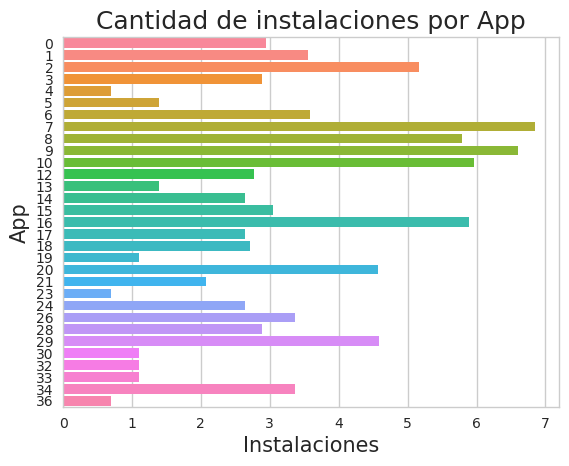

In [295]:
'''
Grafico de barras de aparicion de apps.
'''

g = sns.barplot(x=app_log.values, y=app_log.index, orient='h', saturation = 2)
g.set_title("Cantidad de instalaciones por App", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("App", fontsize=15)

Hay una clara diferencia entre las aplicaciones 7 y 9 respecto de las demas.
Veamos cuanto abarcan realmente:

In [296]:
def top2Apps(app):
    if (app == 7 or app == 9):
        return app
    return 'Otro'

In [297]:
installs['appGeneralizado'] = installs['application_id'].apply(top2Apps)
topApp = installs['appGeneralizado'].value_counts()

Text(0,0.5,'')

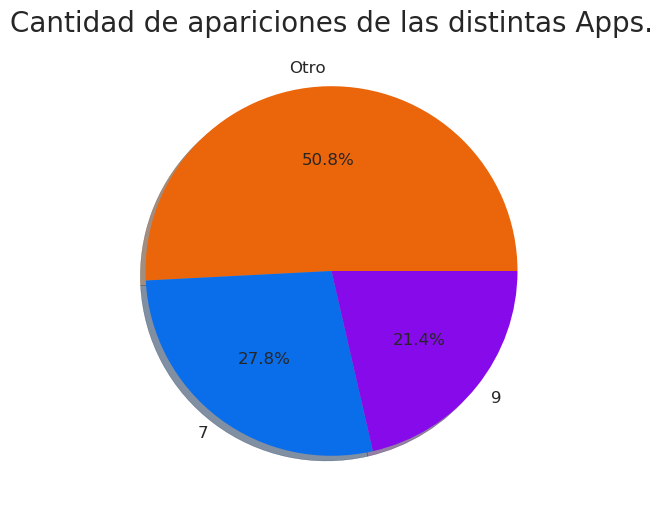

In [298]:
'''
Grafico pie de las apps.
'''
g = topApp.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),shadow=True,fontsize=12,colors=[(0.921, 0.396, 0.039),(0.039, 0.431, 0.921),(0.529, 0.039, 0.921)])
g.set_title("Cantidad de apariciones de las distintas Apps.",fontsize=20)
g.set_ylabel("")

Entre estas dos aplicaciones abarcan casi el 50% de las apariciones de aplicaciones.

## Que pasa respecto a los dias y horas?

In [299]:
'''
Separo la fecha de creacion en dia mes y anio
'''
installs['anio'] = installs['created'].apply(lambda x: x.year)
installs['mes'] = installs['created'].apply(lambda x: x.month)
installs['dia'] = installs['created'].apply(lambda x: x.day)
installs['hora'] = installs['created'].apply(lambda x: x.hour)
installs['minuto'] = installs['created'].apply(lambda x: x.minute)

installs['diaDeLaSemana'] = installs['created'].apply(lambda x: x.dayofweek)
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,...,trans_id,ip_address,device_language,appGeneralizado,anio,mes,dia,hora,minuto,diaDeLaSemana
0,2019-03-13 01:43:33.445,0,1,8464844987297247076,nan,False,False,1,0.00,0.00,...,NaN,5529284367937637301,-1.00,Otro,2019,3,13,1,43,2
1,2019-03-13 04:58:35.078,0,1,3250564871270161533,nan,False,False,1,0.00,0.00,...,NaN,6098022721363533304,-1.00,Otro,2019,3,13,4,58,2
2,2019-03-13 04:20:57.666,0,1,7953318831018100268,nan,False,True,1,1.00,1.00,...,NaN,4636407223847323867,1.00,Otro,2019,3,13,4,20,2
3,2019-03-13 04:20:57.698,0,1,7953318831018100268,nan,False,False,1,1.00,1.00,...,NaN,4636407223847323867,-1.00,Otro,2019,3,13,4,20,2
4,2019-03-10 22:24:56.684,0,1,8355110941557237501,nan,False,True,1,2.00,2.00,...,NaN,685400811232710215,1.00,Otro,2019,3,10,22,24,6


In [300]:
installs['anio'].value_counts()

2019    3412
Name: anio, dtype: int64

In [301]:
installs['mes'].value_counts()

3    3412
Name: mes, dtype: int64

No parece haber una variedad significativa como para analizar las diferencias entre los valores. Los quito del df.

In [302]:
installs['dia'].value_counts()

12    472
13    423
7     393
11    377
9     368
8     366
10    351
5     337
6     325
Name: dia, dtype: int64

In [303]:
'''
Me quedo con una semana sin dias de la semana repetidos.
'''
installs = installs.loc[installs['dia'] <= 11]

In [304]:
'''
Quedo solo con dia, hora, minutos y dia de la semana (respecto al tiempo).
'''
installs = installs.drop(['anio','mes'], axis=1)

In [305]:
installs['aparicion'] = 1
for_heatmap = installs.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')

Text(50.7222,0.5,'Dia')

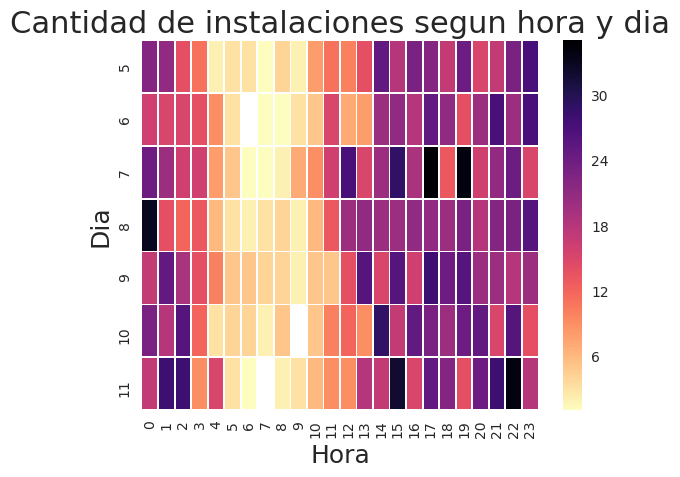

In [306]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="magma_r") # annot=True
g.set_title("Cantidad de instalaciones segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

Podemos ver una disminucion de instalaciones entre las 3hs. y las 10hs.

In [307]:
installsPorDiaDeSemana = installs.groupby('diaDeLaSemana')['appGeneralizado'].value_counts().to_frame()
installsPorDiaDeSemana.columns = ['cantidad']
installsPorDiaDeSemana = installsPorDiaDeSemana.unstack()
installsPorDiaDeSemana

cantidad          
appGeneralizado        7    9 Otro
diaDeLaSemana                     
0                     97   74  206
1                    114   60  163
2                    102   82  141
3                    122  100  171
4                    108   85  173
5                     97   53  218
6                     90   54  207

Text(0.5,0,'Dia de la semana')

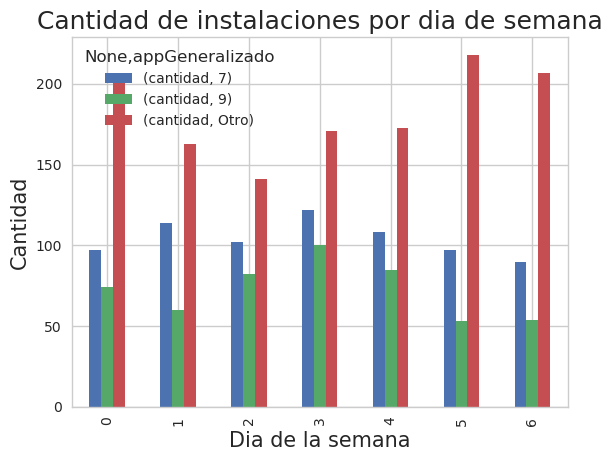

In [308]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = installsPorDiaDeSemana.plot.bar()
g.set_title("Cantidad de instalaciones por dia de semana", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Dia de la semana", fontsize=15)

Podemos ver que e su mayoria, las aplicacion 7 es instalada con mas frecuencia los dias martes y jueves, la aplicacion 9 los dias miercoles, jueves y viernes, y otra aplicaciones los sabados, domingos y lunes.
Por otro lado, solo contamos con la informacion de una semana, por lo que no podemos asegurar que este sea un comportamiento general de las instalaciones.
Tambien podria verse como patron como las dos aplicaciones con mas instalaciones aumentan su numero de las mismas a medida que nos acercamos a la mitad e la semana, para luego decrementar. Lo contrario sucede con las aplicaiones con menos instalaciones.

In [309]:
installs = installs.set_index('created')
installs = installs.sort_index()
installs.head()

,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,...,wifi,trans_id,ip_address,device_language,appGeneralizado,dia,hora,minuto,diaDeLaSemana,aparicion
created,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:00:38.219,5,2,5924583283197158397,nan,False,True,2,-1.00,383.00,adjust.com,...,NaN,NaN,3229461773198195808,1.00,Otro,5,0,0,1,1
2019-03-05 00:05:35.234,16,1,1740562126672148647,nan,False,False,1,12.00,143.00,http-kit/2.0,...,False,NaN,5663271682545770209,4.00,Otro,5,0,5,1,1
2019-03-05 00:07:25.431,16,1,760677655438420566,nan,False,False,1,18.00,263.00,http-kit/2.0,...,True,NaN,7488499899710199132,28.00,Otro,5,0,7,1,1
2019-03-05 00:07:38.572,8,2,5006759053482448963,nan,False,False,2,-1.00,77.00,adjust.com,...,NaN,NaN,5391189184595770642,1.00,Otro,5,0,7,1,1
2019-03-05 00:10:36.708,7,1,3318538943125451633,nan,False,False,2,-1.00,27.00,adjust.com,...,NaN,NaN,8558502523264989966,1.00,7,5,0,10,1,1


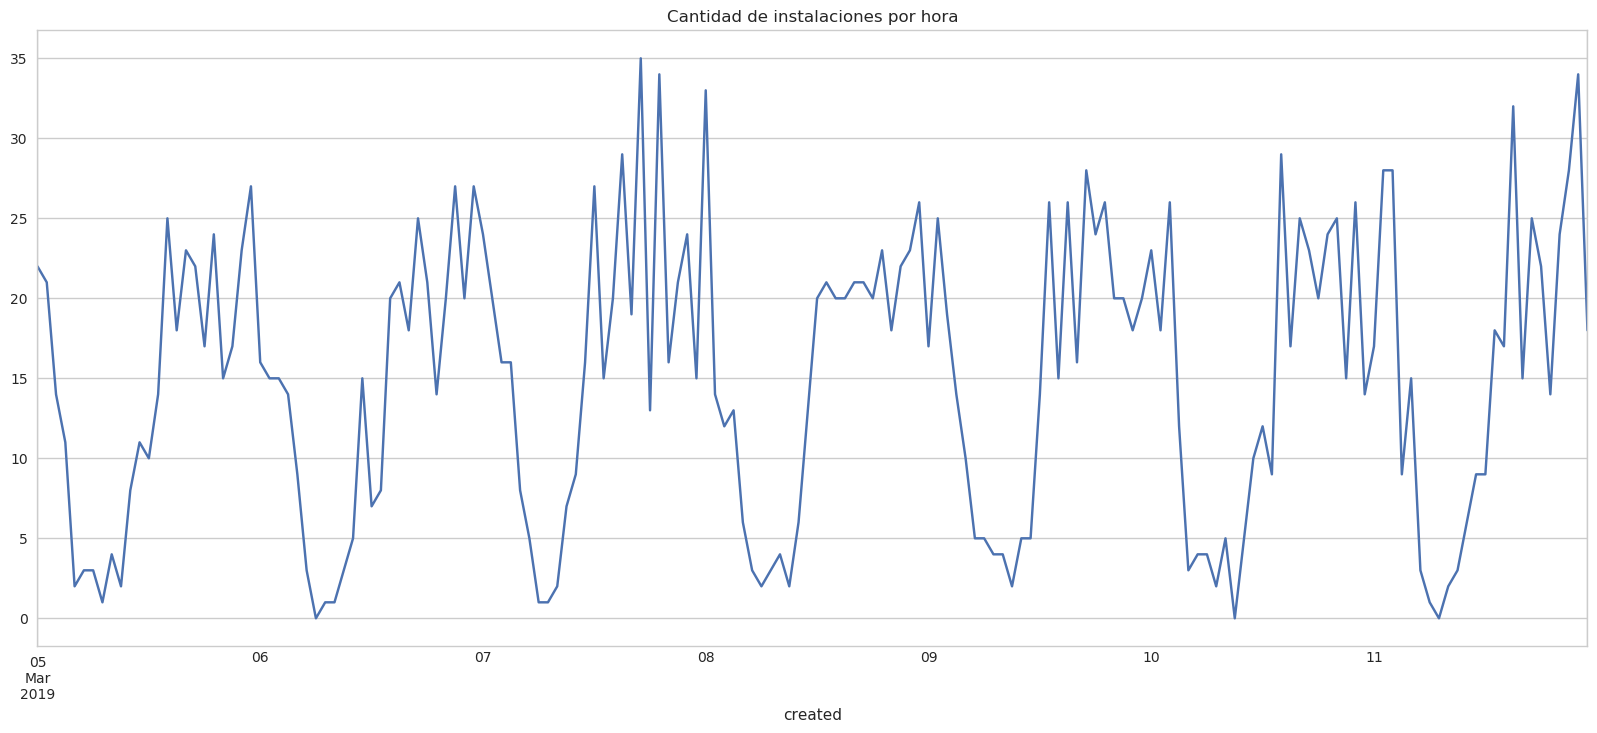

In [310]:
hourly_installs = installs.resample('H').size()
hourly_installs.plot(kind='line', figsize=(20, 8), title='Cantidad de instalaciones por hora', grid=True)

## Hay un ref_type que aparezca mucho mas que otro?

In [311]:
aparicionesRefType = installs['ref_type'].value_counts()
aparicionesRefType

1    1540
2     977
Name: ref_type, dtype: int64

Text(0,0.5,'Ref_Type')

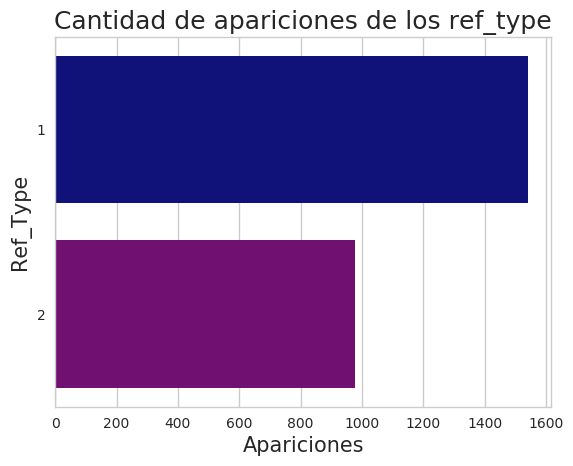

In [312]:
'''
Grafico de barras de apariciones de los ref_type.
'''

g = sns.barplot(x=aparicionesRefType.values, y=aparicionesRefType.index, orient='h',palette=['darkblue','purple'])
g.set_title("Cantidad de apariciones de los ref_type", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Ref_Type", fontsize=15)

Las apariciones de 1 son casi del doble de las de 2.

Text(0,0.5,'Cantidad')

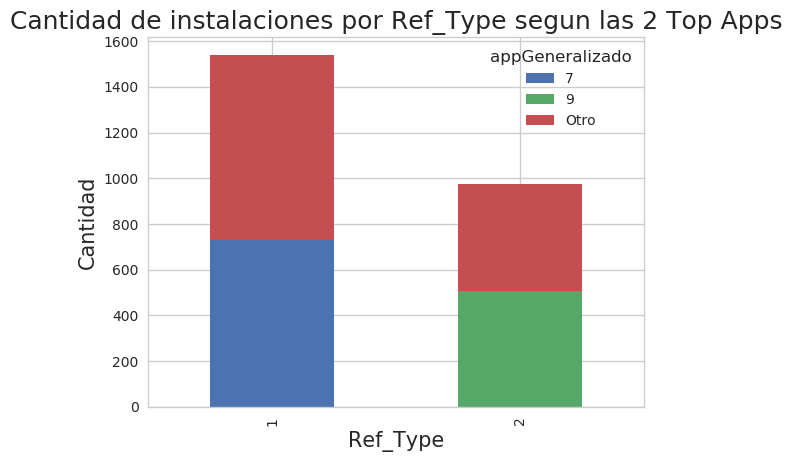

In [313]:
g = installs.groupby(['ref_type', 'appGeneralizado'])['ref_type'].count().unstack('appGeneralizado').fillna(0) 
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones por Ref_Type segun las 2 Top Apps", fontsize=18)
g.set_xlabel("Ref_Type", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Podemos ver algo interesante. Parece ser que la aplicaion 9 es instalada casi por completo (si es que no es por completo) por ref_types de tipo 2, mientras que la aplicacion 7 es instalada a traves de 1.
Por otro lado, puede que la reparticion de estas dos aplicaciones entre ambos ref_types sea tan marcada debido a que son compatibles con solo uno de los tipos de dispositivo.
Tambien podria darse esto por la complementacion a los respectivos dispositivos, contando uno con una caracteristica que el otro no posee y viseversa.

In [314]:
top10apps = list(installs['application_id'].value_counts().head(10).to_frame().reset_index()['index'])

In [315]:
def top10Apps(app):
    if app in top10apps:
        return app
    return 'Otro'

In [316]:
installs['top10apps'] = installs['application_id'].apply(top10Apps)
topApp = installs['top10apps'].value_counts()

Text(0,0.5,'Cantidad')

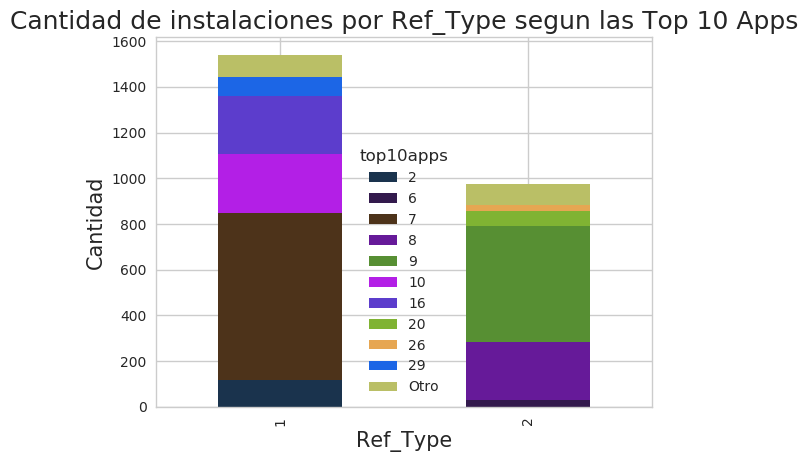

In [317]:
my_colors = [(0.1,0.2,0.3), (0.2, 0.1, 0.3), (0.3, 0.2, 0.1), (0.4, 0.1, 0.6), (0.34, 0.56, 0.2), (0.7, 0.12, 0.90), (0.36, 0.24, 0.8), (0.5, 0.7, 0.2), (0.9, 0.65, 0.32), (0.11, 0.4, 0.9), (0.73, 0.75, 0.4)]

g = installs.groupby(['ref_type', 'top10apps'])['ref_type'].count().unstack('top10apps').fillna(0) 
g = g.plot(kind='bar', stacked=True, color=my_colors)
g.set_title("Cantidad de instalaciones por Ref_Type segun las Top 10 Apps", fontsize=18)
g.set_xlabel("Ref_Type", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Aca vemos que en ambos ref_type hay aplicaciones distitas. Puede ser porque una misma app tiene codigo diferente por cada ref_type; porque cierta app esta disponible solo en un tipo de ref_type; o porque complementan distintas cosas de los dispocitivos (o aparecen mas propagandas en un tipo de ref_type mas que en otro).

In [318]:
ref_typePorDiaDeSemana = installs.groupby('diaDeLaSemana')['ref_type'].value_counts().to_frame()
ref_typePorDiaDeSemana.columns = ['cantidad']
ref_typePorDiaDeSemana = ref_typePorDiaDeSemana.unstack()
ref_typePorDiaDeSemana

cantidad     
ref_type             1    2
diaDeLaSemana              
0                  246  131
1                  207  130
2                  187  138
3                  229  164
4                  224  142
5                  228  140
6                  219  132

Text(0.5,0,'Dia de la semana')

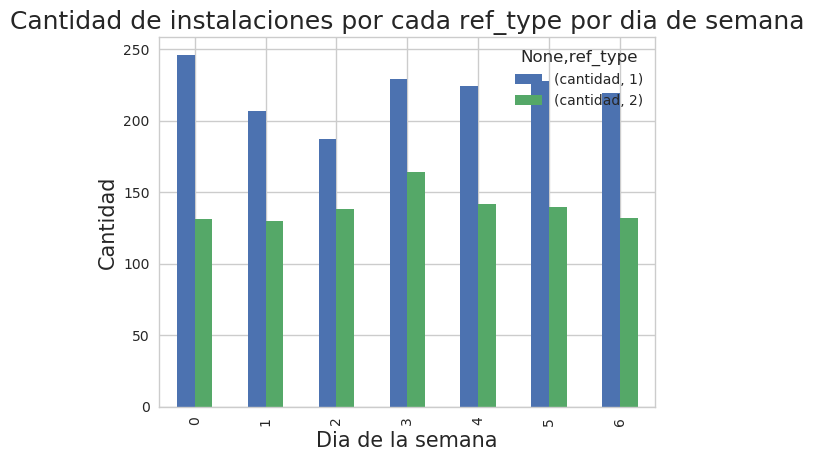

In [319]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = ref_typePorDiaDeSemana.plot.bar()
g.set_title("Cantidad de instalaciones por cada ref_type por dia de semana", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Dia de la semana", fontsize=15)

## Cual es el margen de instalaciones implicitas?

In [320]:
implicitas = installs['implicit'].value_counts().to_frame().reset_index()
implicitas['index'] = implicitas['index'].apply(lambda x: 'No implicita' if not x else 'Implicita')
implicitas = implicitas.set_index(['index'])
implicitas

,implicit
index,
No implicita,1878
Implicita,639


Text(0,0.5,'Es implicita?')

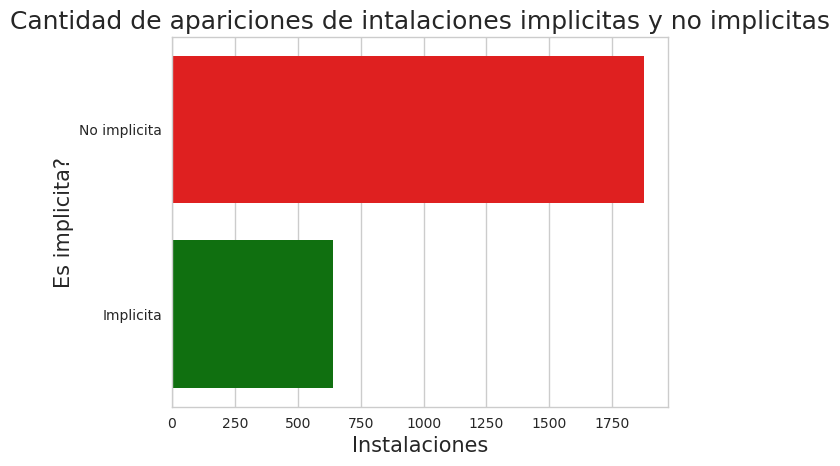

In [321]:
'''
Grafico de barras de instalaciones implicitas y no implicitas.
'''

g = sns.barplot(x=implicitas['implicit'].values, y=implicitas['implicit'].index, orient='h',palette=['red','green'])
g.set_title("Cantidad de apariciones de intalaciones implicitas y no implicitas", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("Es implicita?", fontsize=15)

Text(0,0.5,'Cantidad')

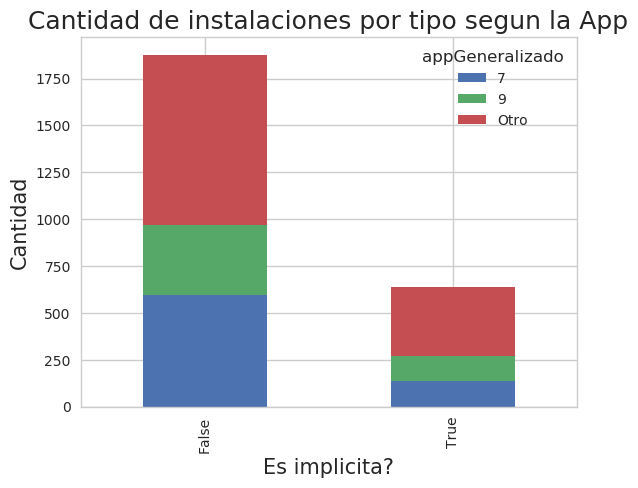

In [322]:
g = installs.groupby(['implicit', 'appGeneralizado'])['implicit'].count().unstack('appGeneralizado').fillna(0) 
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones por tipo segun la App", fontsize=18)
g.set_xlabel("Es implicita?", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Si bien las instalaciones de tipo no implicito abarcan la gran mayoria de las instalaciones, la aplicacion 7 se ve proporcionalmente mas intalada de modo no implicito. Mientras, la aplicacion 9 cuenta con un mayor porcentage de instalaciones en las de tipo implicitas.

## Paises?

In [323]:
paises = installs['device_countrycode'].value_counts()
paises

1    1277
2    1240
Name: device_countrycode, dtype: int64

Text(0,0.5,'Pais')

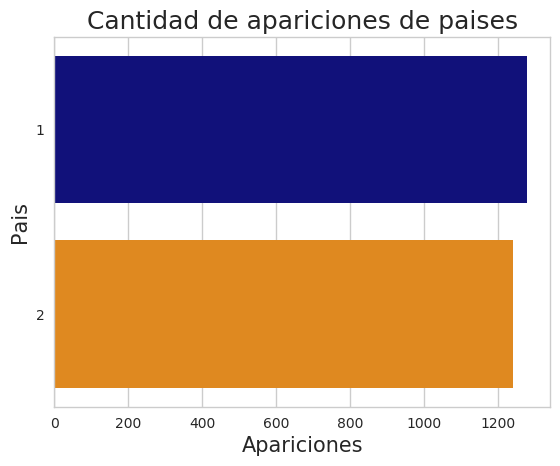

In [324]:
'''
Grafico de barras de apariciones de paises.
'''

g = sns.barplot(x=paises.values, y=paises.index, orient='h',palette=['darkblue','darkorange'])
g.set_title("Cantidad de apariciones de paises", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Pais", fontsize=15)

Ambos paises estan muy parejos.

Text(0,0.5,'Cantidad')

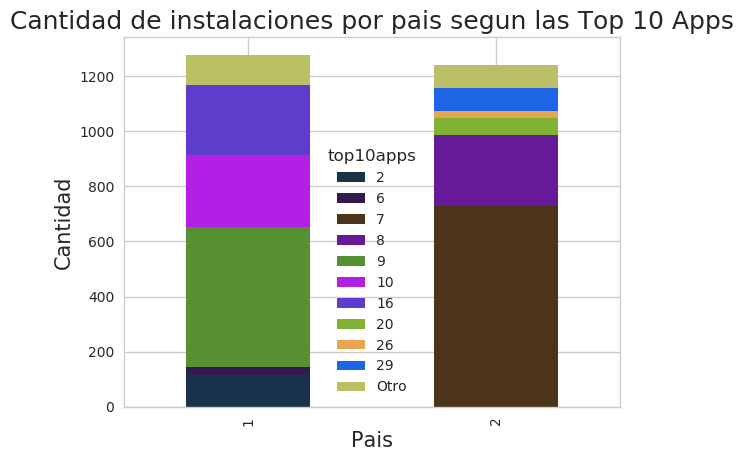

In [325]:
my_colors = [(0.1,0.2,0.3), (0.2, 0.1, 0.3), (0.3, 0.2, 0.1), (0.4, 0.1, 0.6), (0.34, 0.56, 0.2), (0.7, 0.12, 0.90), (0.36, 0.24, 0.8), (0.5, 0.7, 0.2), (0.9, 0.65, 0.32), (0.11, 0.4, 0.9), (0.73, 0.75, 0.4)]

g = installs.groupby(['device_countrycode', 'top10apps'])['device_countrycode'].count().unstack('top10apps').fillna(0) 
g = g.plot(kind='bar', stacked=True, color=my_colors)
g.set_title("Cantidad de instalaciones por pais segun las Top 10 Apps", fontsize=18)
g.set_xlabel("Pais", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Vemos algo parecido a lo que pasaba con las instalaciones segun ref_type: cada pais instla aplicaciones distintas. Puede darse tanto porque en un pais se publicitan ciertas apps que en el otro no, o porque no tienen las mismas necesidades respecto a apps.

## Marca de dispositivo

In [326]:
marcas = installs.loc[installs['device_brand'] != -1]['device_brand'].value_counts()
marcas_log= np.log(marcas+1)
marcas_log

 0.00                   5.82
 3.00                   4.76
 5.00                   4.28
17.00                   4.08
 4.00                   3.58
12.00                   3.33
 1.00                   3.14
 7.00                   3.04
 6.00                   2.20
 2.00                   2.08
 8.00                   1.79
21.00                   1.61
20.00                   1.61
 9.00                   1.39
11.00                   1.39
23.00                   1.39
19.00                   1.10
13.00                   1.10
22.00                   1.10
16.00                   0.69
14.00                   0.69
15.00                   0.69
26.00                   0.69
18.00                   0.69
25.00                   0.69
Name: device_brand, dtype: float64

Text(0,0.5,'Marca')

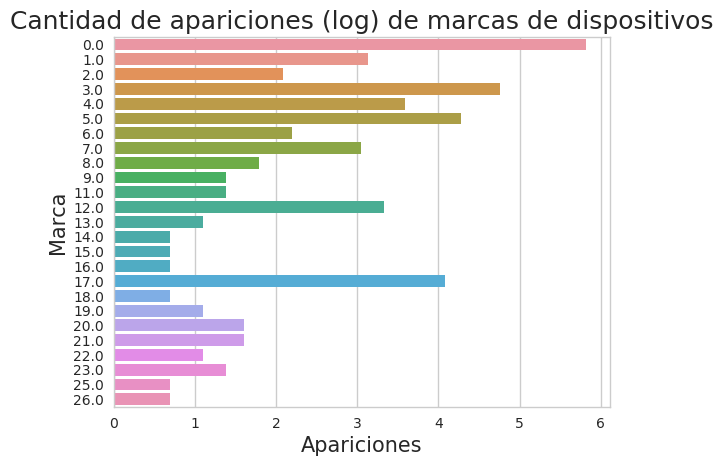

In [327]:
'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=marcas_log.values, y=marcas_log.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

In [328]:
modeloYMarca = installs.loc[installs['device_brand'] != -1].groupby(['device_brand','device_model'])['application_id'].count().to_frame()
modeloYMarca = modeloYMarca.loc[modeloYMarca['application_id']>10].reset_index()[['device_brand','application_id']]
modeloYMarca

,device_brand,application_id
0,0.00,13
1,0.00,16
2,0.00,11
3,0.00,22
4,0.00,30
5,0.00,17
6,3.00,15
7,3.00,11


In [329]:
'''
Instalaciones en dispositivos de marca 308305860557778688.00 segun modelos con mas de 10 instalaciones.
'''
modelo1 = installs.loc[installs['device_brand'] == 0.00].groupby('device_model')['application_id'].count().to_frame()
modelo1 = modelo1.loc[modelo1['application_id'] > 10]#.unstack('device_model')
modelo1

,application_id
device_model,
6.00,13
27.00,16
34.00,11
37.00,22
55.00,30
56.00,17


Text(0,0.5,'Cantidad')

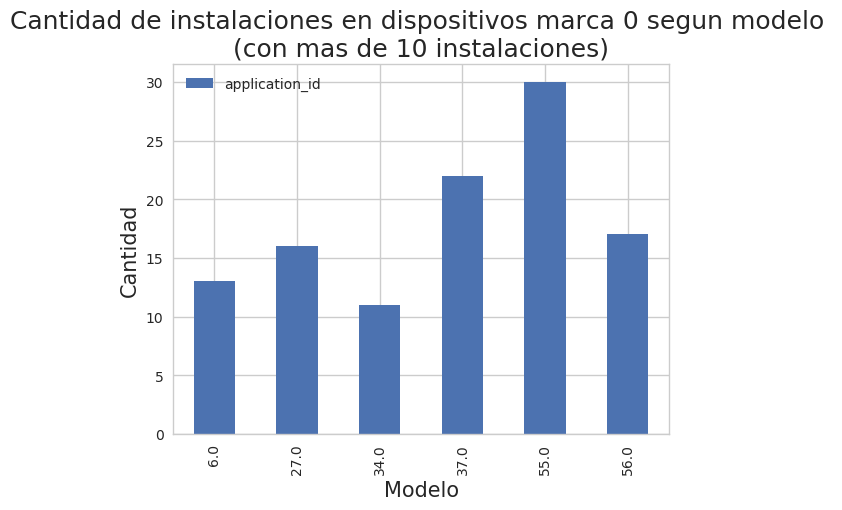

In [330]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = modelo1
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones en dispositivos marca 0 segun modelo \n(con mas de 10 instalaciones)", fontsize=18)
g.set_xlabel("Modelo", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)


In [331]:
'''
Instalaciones en dispositivos de marca 3 segun modelos con mas de 10 instalaciones.
'''
modelo2 = installs.loc[installs['device_brand'] == 3].groupby('device_model')['application_id'].count().to_frame()
modelo2 = modelo2.loc[modelo2['application_id'] > 10]
modelo2

,application_id
device_model,
24.00,15
45.00,11


Text(0,0.5,'Cantidad')

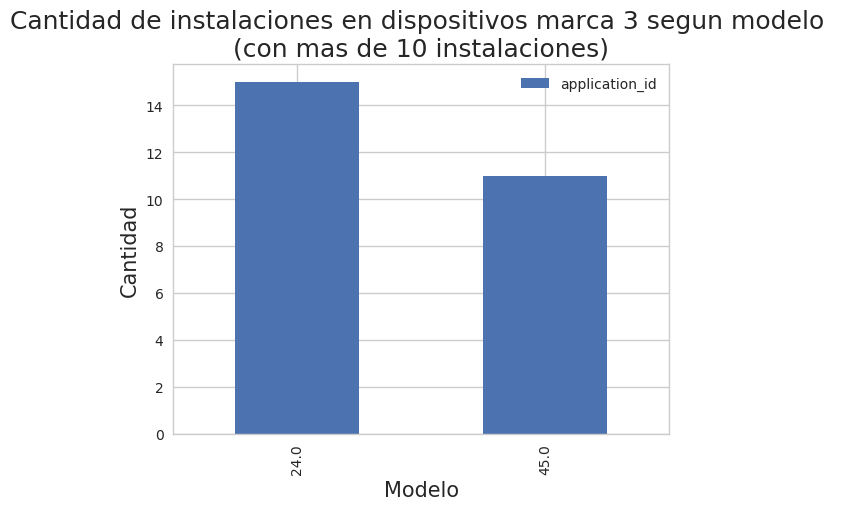

In [332]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = modelo2
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones en dispositivos marca 3 segun modelo \n(con mas de 10 instalaciones)", fontsize=18)
g.set_xlabel("Modelo", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)


## Agente usado para la instalacion

In [333]:
instaladores = installs['session_user_agent'].value_counts().head(3)
instaladores

adjust.com                           1240
http-kit/2.0                         1204
HasOffers Mobile AppTracking v1.0      19
Name: session_user_agent, dtype: int64

Text(0,0.5,'Instalador')

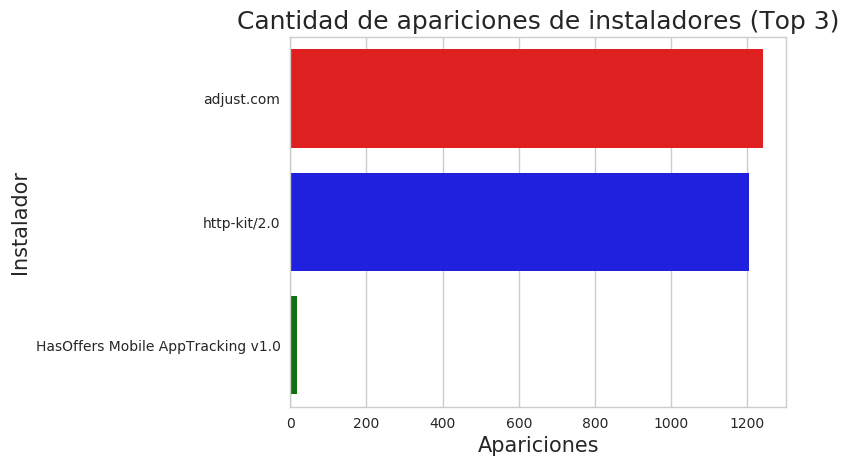

In [334]:
'''
Grafico de barras de apariciones de instaladores.
'''

g = sns.barplot(x=instaladores.values, y=instaladores.index, orient='h',palette=['red','blue','green'])
g.set_title("Cantidad de apariciones de instaladores (Top 3)", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Instalador", fontsize=15)

## User agent

In [335]:
installs['agentes'] = installs['user_agent'].dropna().apply(lambda x: str(x).split('/')[0])
agentesUsuario = installs['agentes'].value_counts()
agentesUsuario

Dalvik         661
MercadoPago    508
NextGen         17
HotelUrbano     10
PeixeUrbano      6
takealot         1
Mozilla          1
Name: agentes, dtype: int64

Text(0,0.5,'Agente de Usuario')

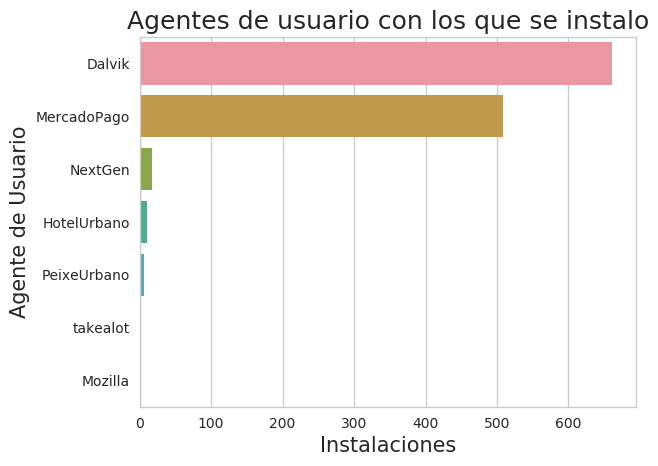

In [336]:
'''
Grafico de barras de apariciones de agentes de usuario.
'''

g = sns.barplot(x=agentesUsuario.values, y=agentesUsuario.index, orient='h')
g.set_title("Agentes de usuario con los que se instalo", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("Agente de Usuario", fontsize=15)

## Tipo de instalacion

In [337]:
installs['kind'].value_counts()

af_app_opened                 303
app_open                      167
EVENT_Homepage                 54
EVENT_OPEN_APP                 27
open                           27
Open                           19
login_success                  10
account_summary_first_step      7
EVENT_LISTINGVIEW_FLIGHT        5
deeplink                        4
EVENT_HOMEPAGE                  4
reattribution                   3
payment method add              2
journey reserved                1
af_list_view                    1
EVENT_PROMO                     1
journey drop off                1
registration                    1
install                         1
journey first drop off          1
Name: kind, dtype: int64

In [338]:
def reducirTipos(tipo):
    tipo = str(tipo).lower()
    palabrasDelTipo = tipo.split('_')
    if ('open' in palabrasDelTipo) or ('opened' in palabrasDelTipo):
        return 'open'
    return str(tipo)

In [339]:
installs['kind'] = installs['kind'].dropna().apply(reducirTipos)

In [340]:
tiposDeInstalacion = installs['kind'].value_counts()
tiposDeInstalacion

open                          543
event_homepage                 58
login_success                  10
account_summary_first_step      7
event_listingview_flight        5
deeplink                        4
reattribution                   3
payment method add              2
journey reserved                1
journey drop off                1
af_list_view                    1
event_promo                     1
registration                    1
install                         1
journey first drop off          1
Name: kind, dtype: int64

Text(0,0.5,'Tipo de instalacion')

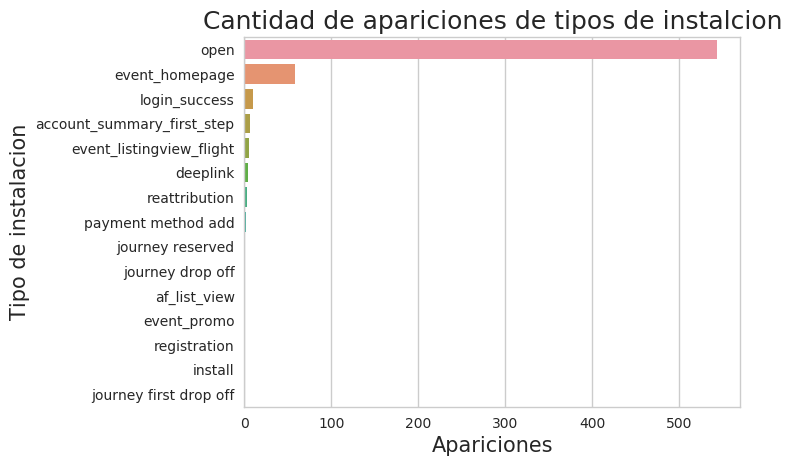

In [341]:
'''
Grafico de barras de apariciones de tipos de instalacion.
'''

g = sns.barplot(x=tiposDeInstalacion.values, y=tiposDeInstalacion.index, orient='h')
g.set_title("Cantidad de apariciones de tipos de instalcion", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Tipo de instalacion", fontsize=15)

## Wifi

In [342]:
installs['wifiLegible'] = installs['wifi'].dropna().apply(lambda x: 'Sin wifi' if not x else 'Con wifi')
wifi = installs['wifiLegible'].value_counts()
wifi

Con wifi    959
Sin wifi    245
Name: wifiLegible, dtype: int64

Text(0,0.5,'')

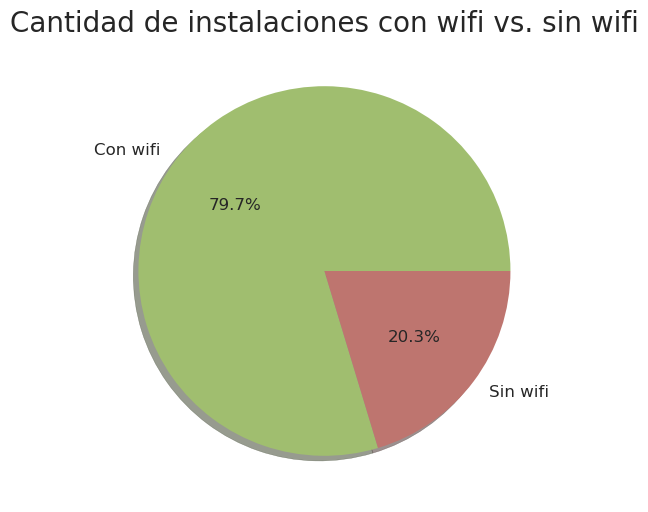

In [343]:
'''
Grafico de instalaciones con wifi vs sin wifi.
'''

g = wifi.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),shadow=True,fontsize=12,colors=[(0.627, 0.745, 0.435),(0.745, 0.458, 0.435)])
g.set_title("Cantidad de instalaciones con wifi vs. sin wifi",fontsize=20)
g.set_ylabel("")

## Device Language

In [344]:
topLeng = installs.loc[installs['device_language'] != -1]['device_language'].value_counts().head(10)
topLeng

 1.00    1152
 3.00     475
 7.00     434
 4.00     182
 5.00      61
 9.00      40
 6.00      35
13.00      32
 8.00      18
12.00      15
Name: device_language, dtype: int64

Text(0,0.5,'Leng')

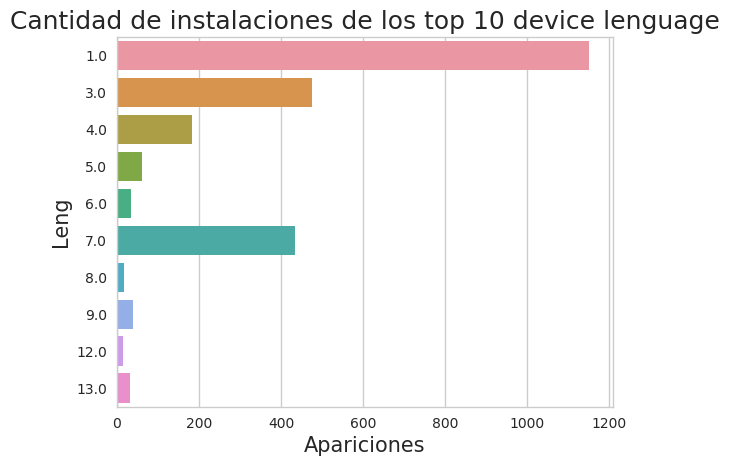

In [345]:
'''
Grafico de barras de apariciones de device lenguage.
'''

g = sns.barplot(x=topLeng.values, y=topLeng.index, orient='h')
g.set_title("Cantidad de instalaciones de los top 10 device lenguage", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Leng", fontsize=15)

## Ref type por dia y hora

In [346]:
refType1 = installs.loc[installs['ref_type'] == 1]

Text(50.7222,0.5,'Dia')

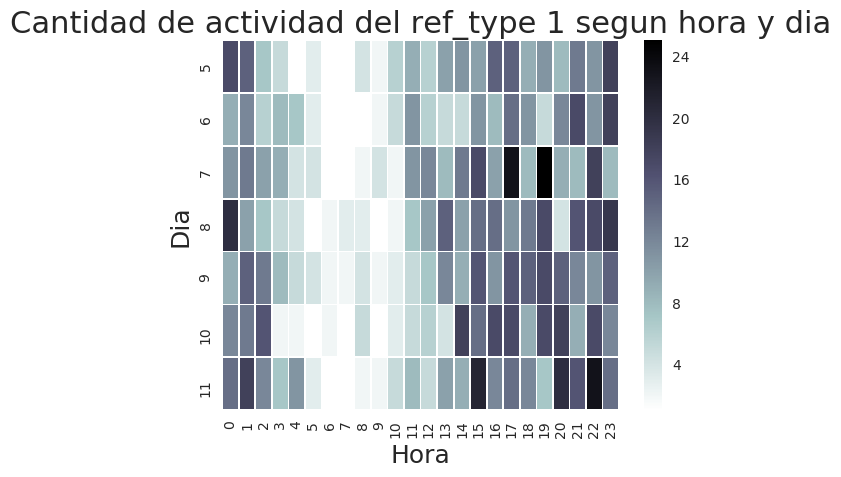

In [347]:
for_heatmap = refType1.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="bone_r") # annot=True
g.set_title("Cantidad de actividad del ref_type 1 segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

In [348]:
refType2 = installs.loc[installs['ref_type'] == 2]

Text(50.7222,0.5,'Dia')

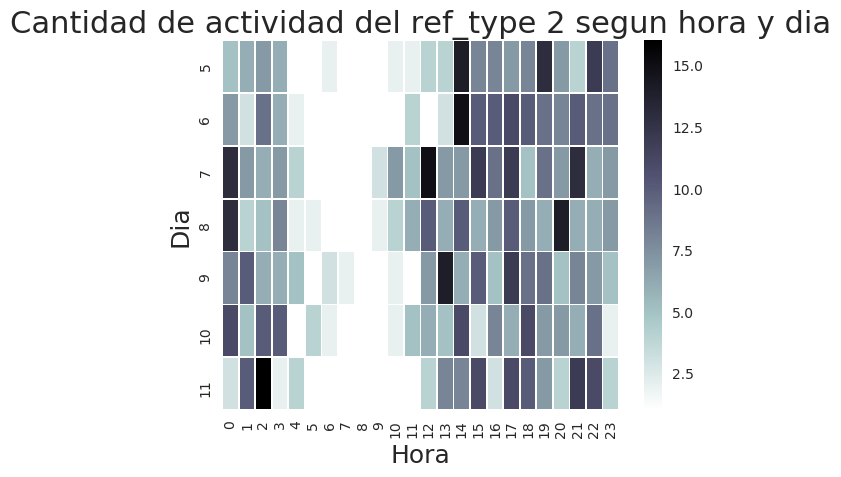

In [349]:
for_heatmap = refType2.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="bone_r") # annot=True
g.set_title("Cantidad de actividad del ref_type 2 segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

# Analisis con Joins

In [351]:
installs['attributed'].value_counts()

False    2517
Name: attributed, dtype: int64